In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install pandas openpyxl


In [3]:
d=pd.read_excel('/content/American express.xlsx')

In [5]:
csv_file = 'output_file.csv'
d.to_csv(csv_file, index=False)

In [6]:
df=pd.read_csv('/content/output_file.csv')

In [7]:
df.head()

,Credit Score,Geography,Gender,Age,Customer Since,Current Account,Num of products,UPI Enabled,Estimated Yearly Income,Closed
0,553,Delhi,Female,45,4,0.000,4,1,274150,0
1,447,Bengaluru,Male,31,7,0.000,4,1,519360,0
2,501,Delhi,Female,32,2,0.000,4,1,545501,0
3,428,Delhi,Male,51,3,0.000,4,1,86868,0
4,492,Delhi,Female,57,6,1912681.501,2,1,518680,0


#DATA PREPROCESSING

Clean th data

In [8]:
print(df.isnull().sum())

Credit Score               0
Geography                  0
Gender                     0
Age                        0
Customer Since             0
Current Account            0
Num of products            0
UPI Enabled                0
Estimated Yearly Income    0
Closed                     0
dtype: int64


**Encode categorical variables**

In [9]:

print(df.describe())


print(df['Geography'].value_counts())
print(df['Gender'].value_counts())


       Credit Score          Age  Customer Since  Current Account  \
count   9927.000000  9927.000000     9927.000000     9.927000e+03   
mean     529.465599    45.666163        4.417447     9.839860e+05   
std       78.610089    16.100517        2.392987     8.407988e+05   
min      285.000000    17.000000        0.000000     0.000000e+00   
25%      475.000000    35.000000        3.000000     0.000000e+00   
50%      531.000000    42.000000        4.000000     1.159221e+06   
75%      584.000000    53.000000        7.000000     1.655112e+06   
max      692.000000   137.000000        8.000000     3.985304e+06   

       Num of products  UPI Enabled  Estimated Yearly Income       Closed  
count      9927.000000  9927.000000              9927.000000  9927.000000  
mean          3.029314     0.704946            274356.781505     0.204291  
std           1.081528     0.456090            157578.700489     0.403203  
min           2.000000     0.000000                32.000000     0.000000 

Analyze correlation

In [11]:

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Geography'] = df['Geography'].astype('category').cat.codes


correlation_matrix = df.corr()
print(correlation_matrix)


                         Credit Score  Geography    Gender       Age  \
Credit Score                 1.000000   0.007923 -0.003290 -0.003187   
Geography                    0.007923   1.000000 -0.017620  0.047198   
Gender                      -0.003290  -0.017620  1.000000 -0.027329   
Age                         -0.003187   0.047198 -0.027329  1.000000   
Customer Since               0.001627   0.001653  0.016685 -0.009784   
Current Account              0.005604   0.332123  0.013725  0.023034   
Num of products              0.013119  -0.014811 -0.014530 -0.045960   
UPI Enabled                 -0.004646   0.004496  0.006266 -0.010328   
Estimated Yearly Income     -0.002359   0.006378 -0.007030 -0.007002   
Closed                      -0.027237   0.152895 -0.106790  0.279776   

                         Customer Since  Current Account  Num of products  \
Credit Score                   0.001627         0.005604         0.013119   
Geography                      0.001653         0.332

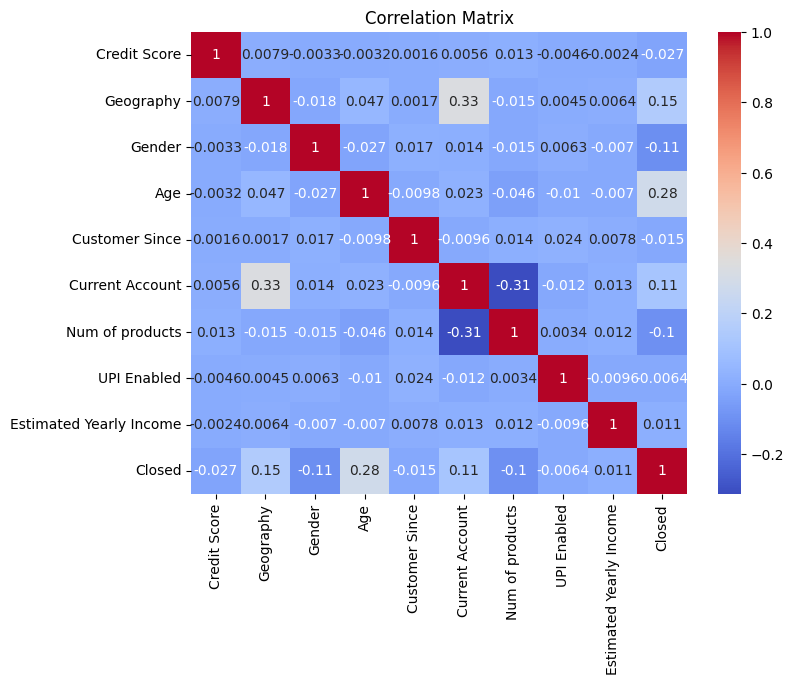

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#*VISUALIZE THE DATA*

In [16]:
pip install plotly


a. Distribution of Credit Scores by Geography

In [17]:
import plotly.express as px

fig = px.box(df, x='Geography', y='Credit Score', title='Credit Score Distribution by Geography')
fig.show()


b. Credit Score by Gender

In [18]:

fig = px.box(df, x='Gender', y='Credit Score', title='Credit Score Distribution by Gender')
fig.show()


c. Age Distribution

In [19]:

fig = px.histogram(df, x='Age', nbins=10, title='Age Distribution', marginal="box")  # Add marginal to show boxplot
fig.show()


**Average Estimated Yearly Income by Geography**

In [20]:

income_by_geo = df.groupby('Geography')['Estimated Yearly Income'].mean().reset_index()

fig = px.bar(income_by_geo, x='Geography', y='Estimated Yearly Income', title='Average Estimated Yearly Income by Geography')
fig.show()


**Age vs Credit Score**

In [21]:

fig = px.scatter(df, x='Age', y='Credit Score', title='Age vs Credit Score', trendline="ols")
fig.show()


**Correlation Matrix**

In [22]:
import plotly.figure_factory as ff

# Correlation Matrix heatmap
correlation_matrix = df.corr().round(2)
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    colorscale='Viridis',
    showscale=True
)

fig.update_layout(title='Correlation Matrix', xaxis_title='Features', yaxis_title='Features')
fig.show()


#**Split the Data**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [23]:
X = df.drop(columns=['Closed'])
y = df['Closed']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 # Model Selection (Random Forest Classifier)

In [28]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.850453172205438
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1565
           1       0.72      0.48      0.58       421

    accuracy                           0.85      1986
   macro avg       0.80      0.71      0.74      1986
weighted avg       0.84      0.85      0.84      1986



Tuning the Model

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# For regression, drop 'Closed' and use Credit Score as target
X = df.drop(columns=['Credit Score', 'Closed'])
y = df['Credit Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 65.2100201409869
